# Data Preprocessing

In [2]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import shutil


In [3]:
classes= ['nv','mel','bkl','bcc','akiec','vasc','df']
base_dir="Dataset"
try:
    os.mkdir(base_dir)
except:
        pass

In [4]:
train_dir="train_dir"
test_dir="test_dir"
try:
    for i in classes:
        os.makedirs(os.path.join(os.getcwd(),base_dir,train_dir,i))
except:
    pass

try:
    for i in classes:
        os.makedirs(os.path.join(os.getcwd(),base_dir,test_dir,i))
except:
    pass

In [5]:
df = pd.read_csv("data/HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
#dx - denotes class of diseases
# nv - Melanocytic nevi
# mel - Melanoma
# bkl - Benign keratosis-like lesions 
# bcc - Basal cell carcinoma
# akiec - Actinic keratoses
# vasc - Vascular lesions
# df - Dermatofibroma

In [7]:
y=df.dx
df_train,df_test=train_test_split(df,test_size=0.1,random_state=100,stratify=y)

In [8]:
print(df_train.shape)
print(df_test.shape)

(9013, 7)
(1002, 7)


In [9]:
df_train['dx'].value_counts()

nv       6034
mel      1002
bkl       989
bcc       463
akiec     294
vasc      128
df        103
Name: dx, dtype: int64

In [10]:
df_test['dx'].value_counts()

nv       671
mel      111
bkl      110
bcc       51
akiec     33
vasc      14
df        12
Name: dx, dtype: int64

In [11]:
all_img=list(df.image_id)
train_img=list(df_train.image_id)
test_img=list(df_train.image_id)

In [8]:
folder1 = os.listdir(r'C:\Users\Adriraj Chaudhuri\Desktop\Skin Disease Prediction\data\HAM10000_images_part_1')
folder2 = os.listdir(r'C:\Users\Adriraj Chaudhuri\Desktop\Skin Disease Prediction\data\HAM10000_images_part_2')

In [12]:
df.set_index('image_id', inplace=True)

In [10]:

for imgs in all_img:
    full_imgname=imgs+'.jpg'
    if imgs in train_img:
        sub_dir=train_dir
    else:
        sub_dir=test_dir
    if full_imgname in folder1:
        source_dir=os.path.join(r'C:\Users\Adriraj Chaudhuri\Desktop\Skin Disease Prediction\data\HAM10000_images_part_1',full_imgname)
    else:
        source_dir=os.path.join(r'C:\Users\Adriraj Chaudhuri\Desktop\Skin Disease Prediction\data\HAM10000_images_part_2',full_imgname)       
    label=df.loc[imgs,'dx']
    final_dir=os.path.join(os.getcwd(),base_dir,sub_dir,label,full_imgname)
    shutil.copyfile(source_dir, final_dir)

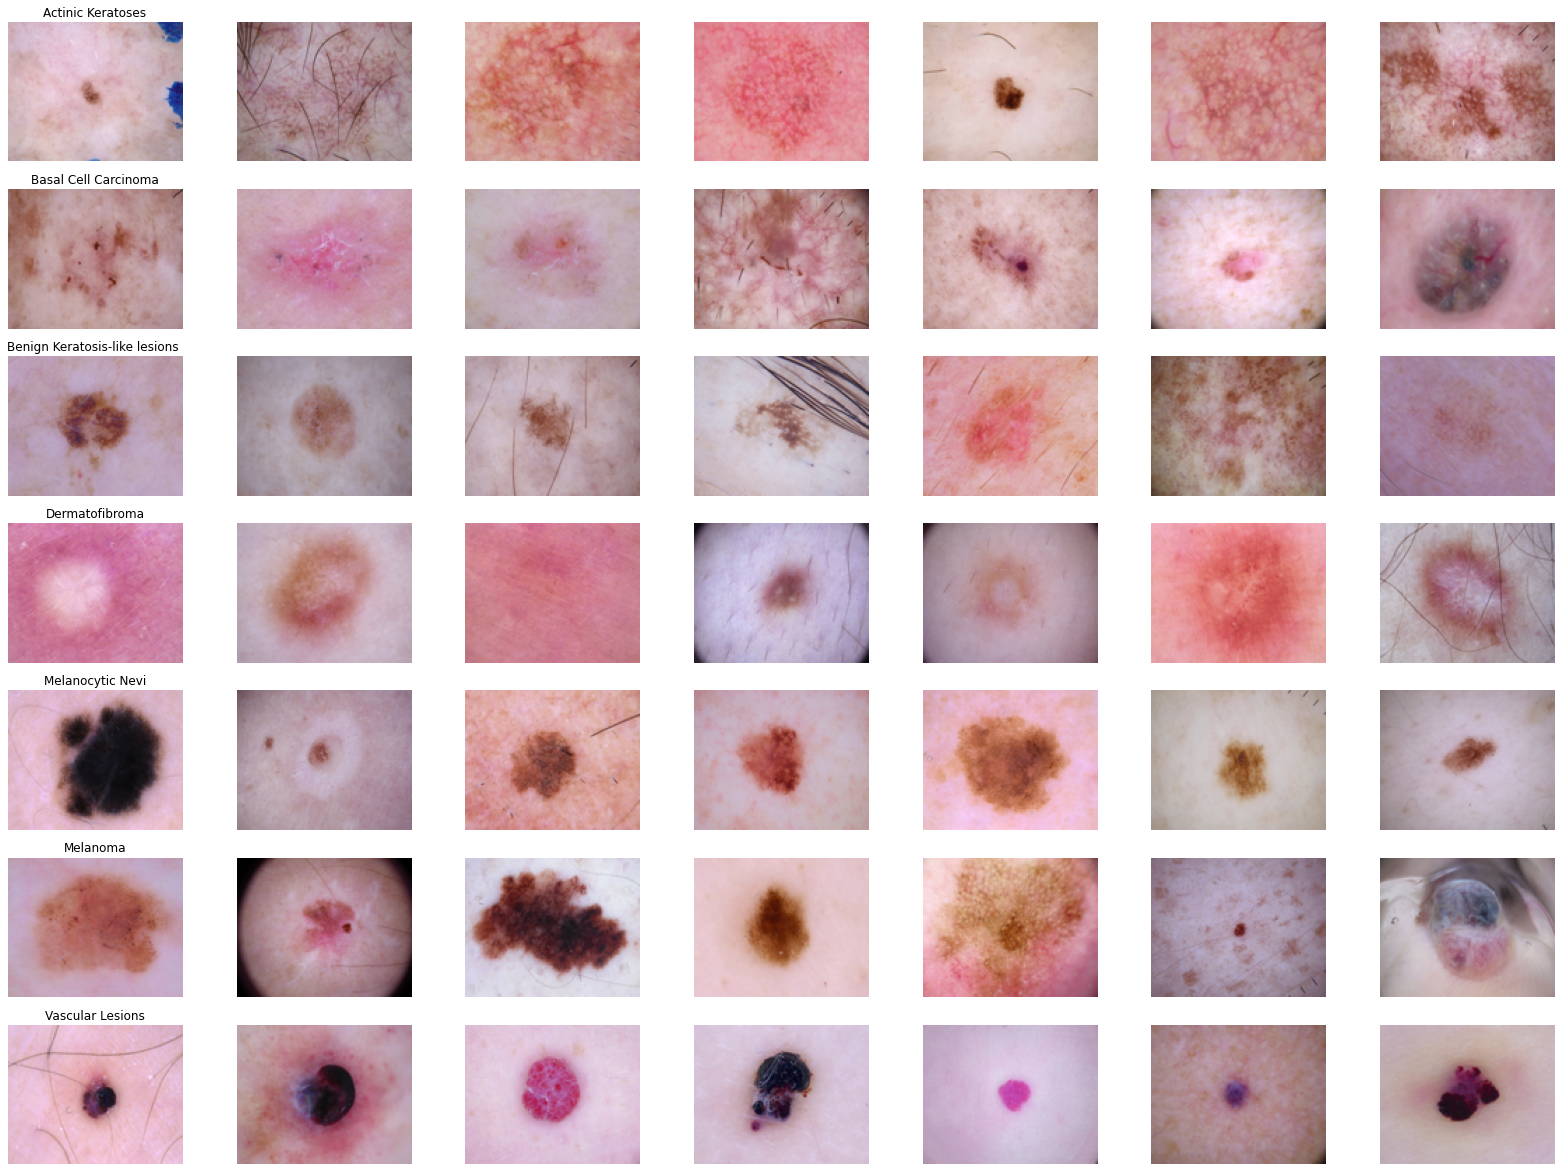

In [14]:
'''n_samples = 7
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)
'''
#This is an old code which was used to visualize images from each class

# Model Creation

In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
x_train=[]
y_train=[]

for i in classes:
    path=os.path.join(os.getcwd(),base_dir,train_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28))
        x_train.append(show_img)
        y_train.append(i)

In [15]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [16]:
print(x_train.shape)
print(y_train.shape)

(9013, 28, 28, 3)
(9013,)


In [17]:

x_test=[]
y_test=[]

for i in classes:
    path=os.path.join(os.getcwd(),base_dir,test_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28),interpolation=cv2.INTER_AREA)
        x_test.append(show_img)
        y_test.append(i)

In [18]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [19]:
print(x_test.shape)
print(y_test.shape)


(1002, 28, 28, 3)
(1002,)


In [20]:
y_test =pd.get_dummies(y_test)
y_train =pd.get_dummies(y_train)

In [21]:
print(y_test.shape)
print(y_train.shape)

(1002, 7)
(9013, 7)


In [22]:
def preprocess(img):
    img = img/255
    return img

x_test = np.array(list(map(preprocess, x_test)))
x_train = np.array(list(map(preprocess, x_train)))

In [24]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dropout,Flatten,Dense


model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512,activation='sigmoid'))
model.add(Dense(7,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,verbose=1,batch_size=128,epochs=20,shuffle='True',validation_data=(x_test,y_test))

Epoch 1/20
71/71 [==============================] - 7s 93ms/step - loss: 1.0965 - accuracy: 0.6562 - val_loss: 0.9810 - val_accuracy: 0.6697
Epoch 2/20
71/71 [==============================] - 6s 82ms/step - loss: 0.9637 - accuracy: 0.6724 - val_loss: 0.9889 - val_accuracy: 0.6427
Epoch 3/20
71/71 [==============================] - 6s 84ms/step - loss: 0.9104 - accuracy: 0.6832 - val_loss: 1.0592 - val_accuracy: 0.6697
Epoch 4/20
71/71 [==============================] - 6s 82ms/step - loss: 0.8928 - accuracy: 0.6822 - val_loss: 0.8842 - val_accuracy: 0.6886
Epoch 5/20
71/71 [==============================] - 6s 81ms/step - loss: 0.8719 - accuracy: 0.6893 - val_loss: 0.8805 - val_accuracy: 0.6906
Epoch 6/20
71/71 [==============================] - 5s 76ms/step - loss: 0.8586 - accuracy: 0.6916 - val_loss: 0.9601 - val_accuracy: 0.6717
Epoch 7/20
71/71 [==============================] - 6s 78ms/step - loss: 0.8417 - accuracy: 0.7021 - val_loss: 0.9599 - val_accuracy: 0.6886
Epoch 8/20
71

In [ ]:
tf.keras.models.save_model(model,'my_model.hdf5')